# Import packages for plotting and analyzing data

In [31]:
import matplotlib.pyplot as plt
import mplstereonet
import pandas as pd
import numpy as np

# Plot two planes and determine their intersection

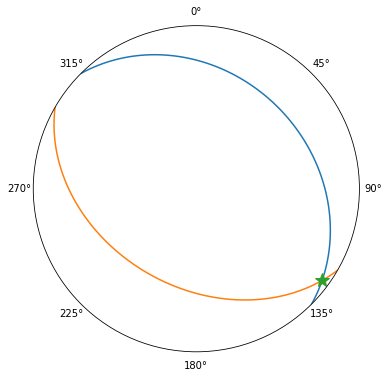

In [32]:
strike1, dip1 = 315, 30
strike2, dip2 = 120, 40

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')

# Plot the two planes...
ax.plane(strike1, dip1)
ax.plane(strike2, dip2)

# Find the intersection of the two as a plunge/bearing
plunge, trend = mplstereonet.plane_intersection(strike1, dip1, strike2, dip2)

# Plot the plunge/trend
ax.line(plunge, trend, marker='*', markersize=15)

plt.show()

In [33]:
print("The trend of the fold axis is:")
print(trend)
print("The plunge of the fold axis is:")
print(plunge)

The trend of the fold axis is:
[126.10636037]
The plunge of the fold axis is:
[5.10063327]


# Plot a lot of planes and determine the fold axis

In [34]:
fake_planes_data = pd.read_csv('fake_planes.csv')
fake_planes_data

,strike,dip
0,301.612782,83.526003
1,306.092876,75.216800
2,300.649056,88.755718
3,300.539252,71.767969
4,296.297720,67.301052
5,311.796986,52.273319
6,297.197393,62.793971
7,265.787145,38.540912
8,295.306304,34.171437
9,248.503368,22.206321


In [35]:
fake_planes_strike = fake_planes_data['strike']
fake_planes_dip = fake_planes_data['dip']

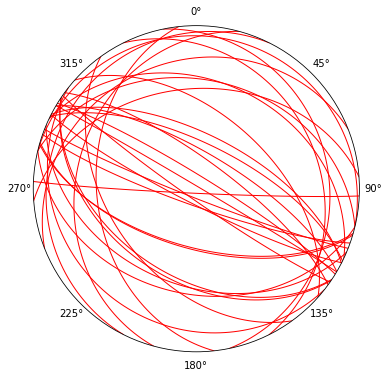

In [36]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')

ax.plane(fake_planes_strike, fake_planes_dip, 'r-', linewidth=1)

plt.show()

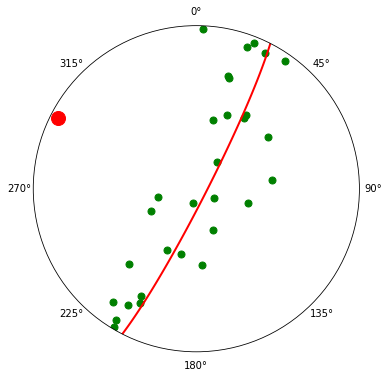

In [45]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')

ax.pole(fake_planes_strike, fake_planes_dip, marker='.', color='green', markersize=14)

fit_strike, fit_dip = mplstereonet.fit_girdle(fake_planes_strike, fake_planes_dip)
ax.plane(fit_strike, fit_dip, color='red', lw=2)
ax.pole(fit_strike, fit_dip, marker='o', color='red', markersize=14)

plt.show()

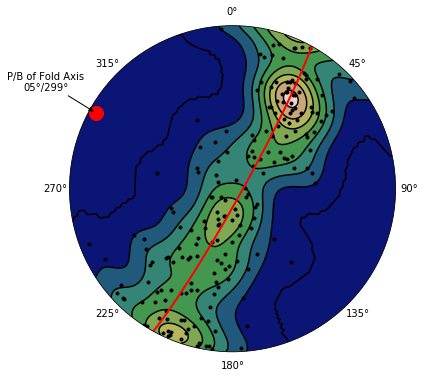

In [38]:
# Generate a random girdle distribution from the plunge/bearing of a fold hinge
# In the end, we'll have strikes and dips as measured from bedding in the fold.
# *strike* and *dip* below would normally be your input.
num_points = 200
real_bearing, real_plunge = 300, 5
s, d = mplstereonet.plunge_bearing2pole(real_plunge, real_bearing)
lon, lat = mplstereonet.plane(s, d, segments=num_points)
lon += np.random.normal(0, np.radians(15), lon.shape)
lat += np.random.normal(0, np.radians(15), lat.shape)
strike, dip = mplstereonet.geographic2pole(lon, lat)

# Plot the raw data and contour it:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='stereonet')
ax.density_contourf(strike, dip, cmap='gist_earth')
ax.density_contour(strike, dip, colors='black')
ax.pole(strike, dip, marker='.', color='black')

# Fit a plane to the girdle of the distribution and display it.
fit_strike, fit_dip = mplstereonet.fit_girdle(strike, dip)
ax.plane(fit_strike, fit_dip, color='red', lw=2)
ax.pole(fit_strike, fit_dip, marker='o', color='red', markersize=14)

# Add some annotation of the result
lon, lat = mplstereonet.pole(fit_strike, fit_dip)
(plunge,), (bearing,) = mplstereonet.pole2plunge_bearing(fit_strike, fit_dip)
template = u'P/B of Fold Axis\n{:02.0f}\u00b0/{:03.0f}\u00b0'
ax.annotate(template.format(plunge, bearing), ha='center', va='bottom',
            xy=(lon, lat), xytext=(-50, 20), textcoords='offset points',
            arrowprops=dict(arrowstyle='-|>', facecolor='black'))

plt.show()